1. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [28]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
np.random.seed(123456)
import math as m
from scipy import stats
from scipy.stats import norm
import pandas as pd
import seaborn as sns
from sklearn import datasets

Integral obtained with guassians: 299.99998417263186
Normalization of integral obtained with guassians: 124.08015766757063
Integral of original histogram: 124.08016421377876


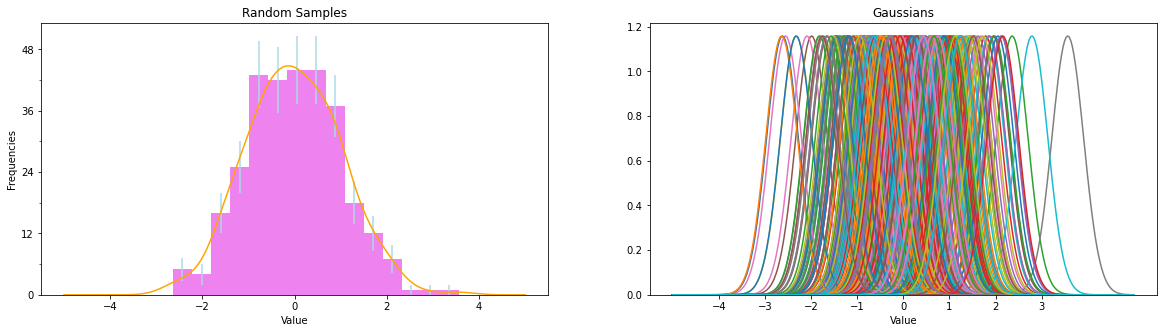

In [47]:
fig,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

#Array x
x = np.random.normal(0,1,300)

#Filling the histogram 
n, bins, _ = ax1.hist(x,15, color= 'violet')
ax1.set_title('Random Samples')
ax1.set_ylabel('Frequencies')
ax1.set_xlabel('Value')

#Set tick
majorLocator = MultipleLocator(12)
minorLocator = MultipleLocator(6)
ax1.yaxis.set_major_locator(majorLocator)
ax1.yaxis.set_minor_locator(minorLocator)

#Data points
dp = np.array([[(bins[i-1]+bins[i])/2 for i in range(1,len(bins))],n,[m.sqrt(n[i]) for i in range(len(n))]])
ax1.errorbar(dp[0,:],dp[1,:],dp[2,:],fmt='none',ecolor='lightblue')

#Gaussians
std = 1.06*x.std()*x.size**(-1./5.)

X=np.linspace(-5, 5, num=300)
Xpdf=[]

for i in range(len(x)):
    mean = x[i]
    Xpdf.append(norm.pdf(X,mean,std))
    ax2.plot(X, Xpdf[i], '-')

Xpdf=np.array(Xpdf)
pdf=np.sum(Xpdf, axis=0)
ax2.set_ylim(0,)
ax2.set_xlabel('Value')
ax2.set_title('Gaussians')
plt.xticks(np.arange(-4, 4, step=1))

#Bin width
bin_width=bins[1]-bins[0]

#Integral of original histogram
int_origin=np.sum(n*bin_width)

#Calculate the integral
int_gauss=np.trapz(pdf, X)

#Plot the sum of gaussians
ax1.plot(X, pdf*bin_width,'-', color='orange')


print('Integral obtained with guassians:', int_gauss)
print('Normalization of integral obtained with guassians:', int_gauss*bin_width)
print('Integral of original histogram:', int_origin)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [38]:
!wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png -P ~/data/

--2020-11-29 15:56:16--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.68.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.68.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-29 15:56:17--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc5c822617248d83a03fecb53fae.dl.dropboxusercontent.com/cd/0/inline/BEGfJvFH9EBIHi2MNrGsydzS84Eb-BdVWRPUQF5pt1SRlStM1ErsE1ZZrOPOu_9T-hVeZaJ23xa4wvIlt6rNf01yZsyfkgAqCTYAcMtllByyaA/file# [segue]
--2020-11-29 15:56:17--  https://uc5c822617248d83a03fecb53fae.dl.dropboxusercontent.com/cd/0/inline/BEGfJvFH9EBIHi2MNrGsydzS84Eb-BdVWRPUQF5pt1SRlStM1ErsE1ZZrOPOu_9T-hVeZaJ23xa4w

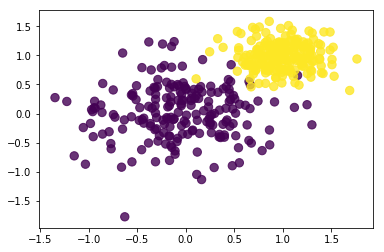

In [48]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('/Users/claudianegrato/data/two_categories_scatter_plot.png')

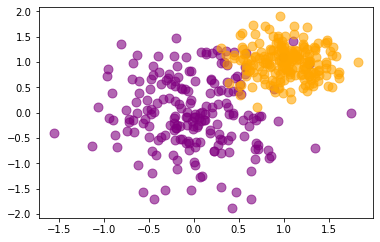

In [50]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot2grid((3,2), (0, 0), colspan=2, rowspan=2)

x1 = np.random.normal(0, 0.5, 200)
y1 = np.random.normal(0, 0.7, 200)
x2 = np.random.normal(1, 0.3, 200)
y2 = np.random.normal(1, 0.3, 200)

scatter = ax1.scatter(x=x1, y=y1, s = 80, c ='purple', alpha = 0.6)
scatter = ax1.scatter(x=x2, y=y2, s = 80, c='orange', alpha = 0.6)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [35]:
# get the dataset and its description on the proper data directory
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy -P ~/data/

--2020-11-29 15:54:43--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.68.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.68.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [segue]
--2020-11-29 15:54:43--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucbe163ff78109f28b931dc7d3e0.dl.dropboxusercontent.com/cd/0/inline/BEHVQethDsTIkgKqaZyJutdhGMfXLjONnM8YfodCkZ3Sz4R8F6PrMjOu0odviy1BHazv3bHMUcsqVNlKHkoqRWeWwOCGb_iJ6utJ-Q4xjvBVxQ/file# [segue]
--2020-11-29 15:54:44--  https://ucbe163ff78109f28b931dc7d3e0.dl.dropboxusercontent.com/cd/0/inline/BEHVQethDsTIkgKqaZyJutdhGMfXLjONnM8YfodCkZ3Sz4R8F6PrMjOu0odviy1BHazv3bHMUcsqVNlKHkoqRWeWwOCGb_iJ6utJ-Q4xjvBVxQ/file
Ris

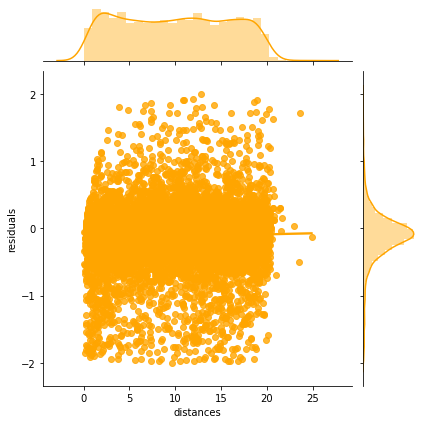

In [51]:
#Load file and create df dataset
data = dict(np.load('/Users/claudianegrato/data/residuals_261.npy', allow_pickle = True).item())
df = pd.DataFrame(data)

#Cleaning
cleand=df[np.absolute(df['residuals']) < 2]
cleand.head()

#Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(cleand['distances'], cleand['residuals'])

#Seaborn plot
sns.jointplot(x = 'distances', y = 'residuals', data = cleand, kind = 'reg', color = 'orange')

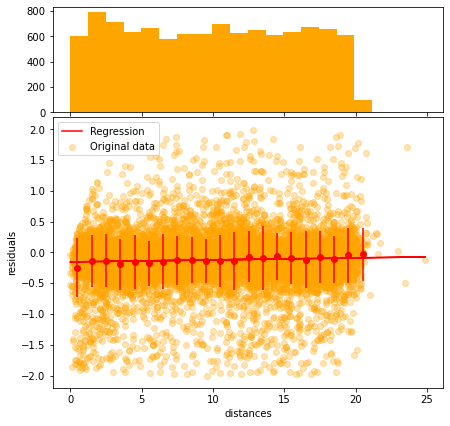

In [52]:
#Filling numpy arrays
bins=8

x=np.arange(0.5,21)
y=np.zeros(21)
erry=np.zeros(21)

sort = cleand.sort_values(by='distances')
dist = sort['distances'].values.copy()
res = sort['residuals'].values.copy()

j=0
for i in range(21): 
    temp=[]
    while dist[j] >= i/2 and dist[j] < i/2+1:
        temp.append(res[j])
        j +=1
    y[i]=np.mean(np.array(temp))
    erry[i]=np.std(np.array(temp))
    
    

#Plot figures
fig = plt.figure(figsize=(7 , 7))
grid = plt.GridSpec(7, 4, hspace=0.1)

ax1= fig.add_subplot(grid[:2, :])
ax1.hist(cleand['distances'],20, color = 'orange')

ax2= fig.add_subplot(grid[2:, :])
ax2.set_xlabel('distances')
ax2.set_ylabel('residuals')
ax2.scatter(cleand['distances'],cleand['residuals'], alpha=0.3,label='Original data', color = 'orange')
ax2.plot(cleand['distances'],cleand['distances']*slope+intercept,label='Regression', color='r')
ax2.errorbar(x,y,erry,fmt='ro')
ax2.legend();    
    